In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

!pip install seaborn

## Lets load the Boston House Pricing Dataset

In [24]:
df = pd.read_csv('BostonHousingPrices.csv')
df = df.dropna()  # optional: remove rows with missing values

X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [36]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [37]:
df.head()         # View first few rows
df.columns      # Check available columns
df.info()        # Understand datatypes & missing values


<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


## Preparing The Dataset

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [51]:
## Summarizing The Stats of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
## Check the missing Values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [54]:
### EXploratory Data Analysis
## Correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


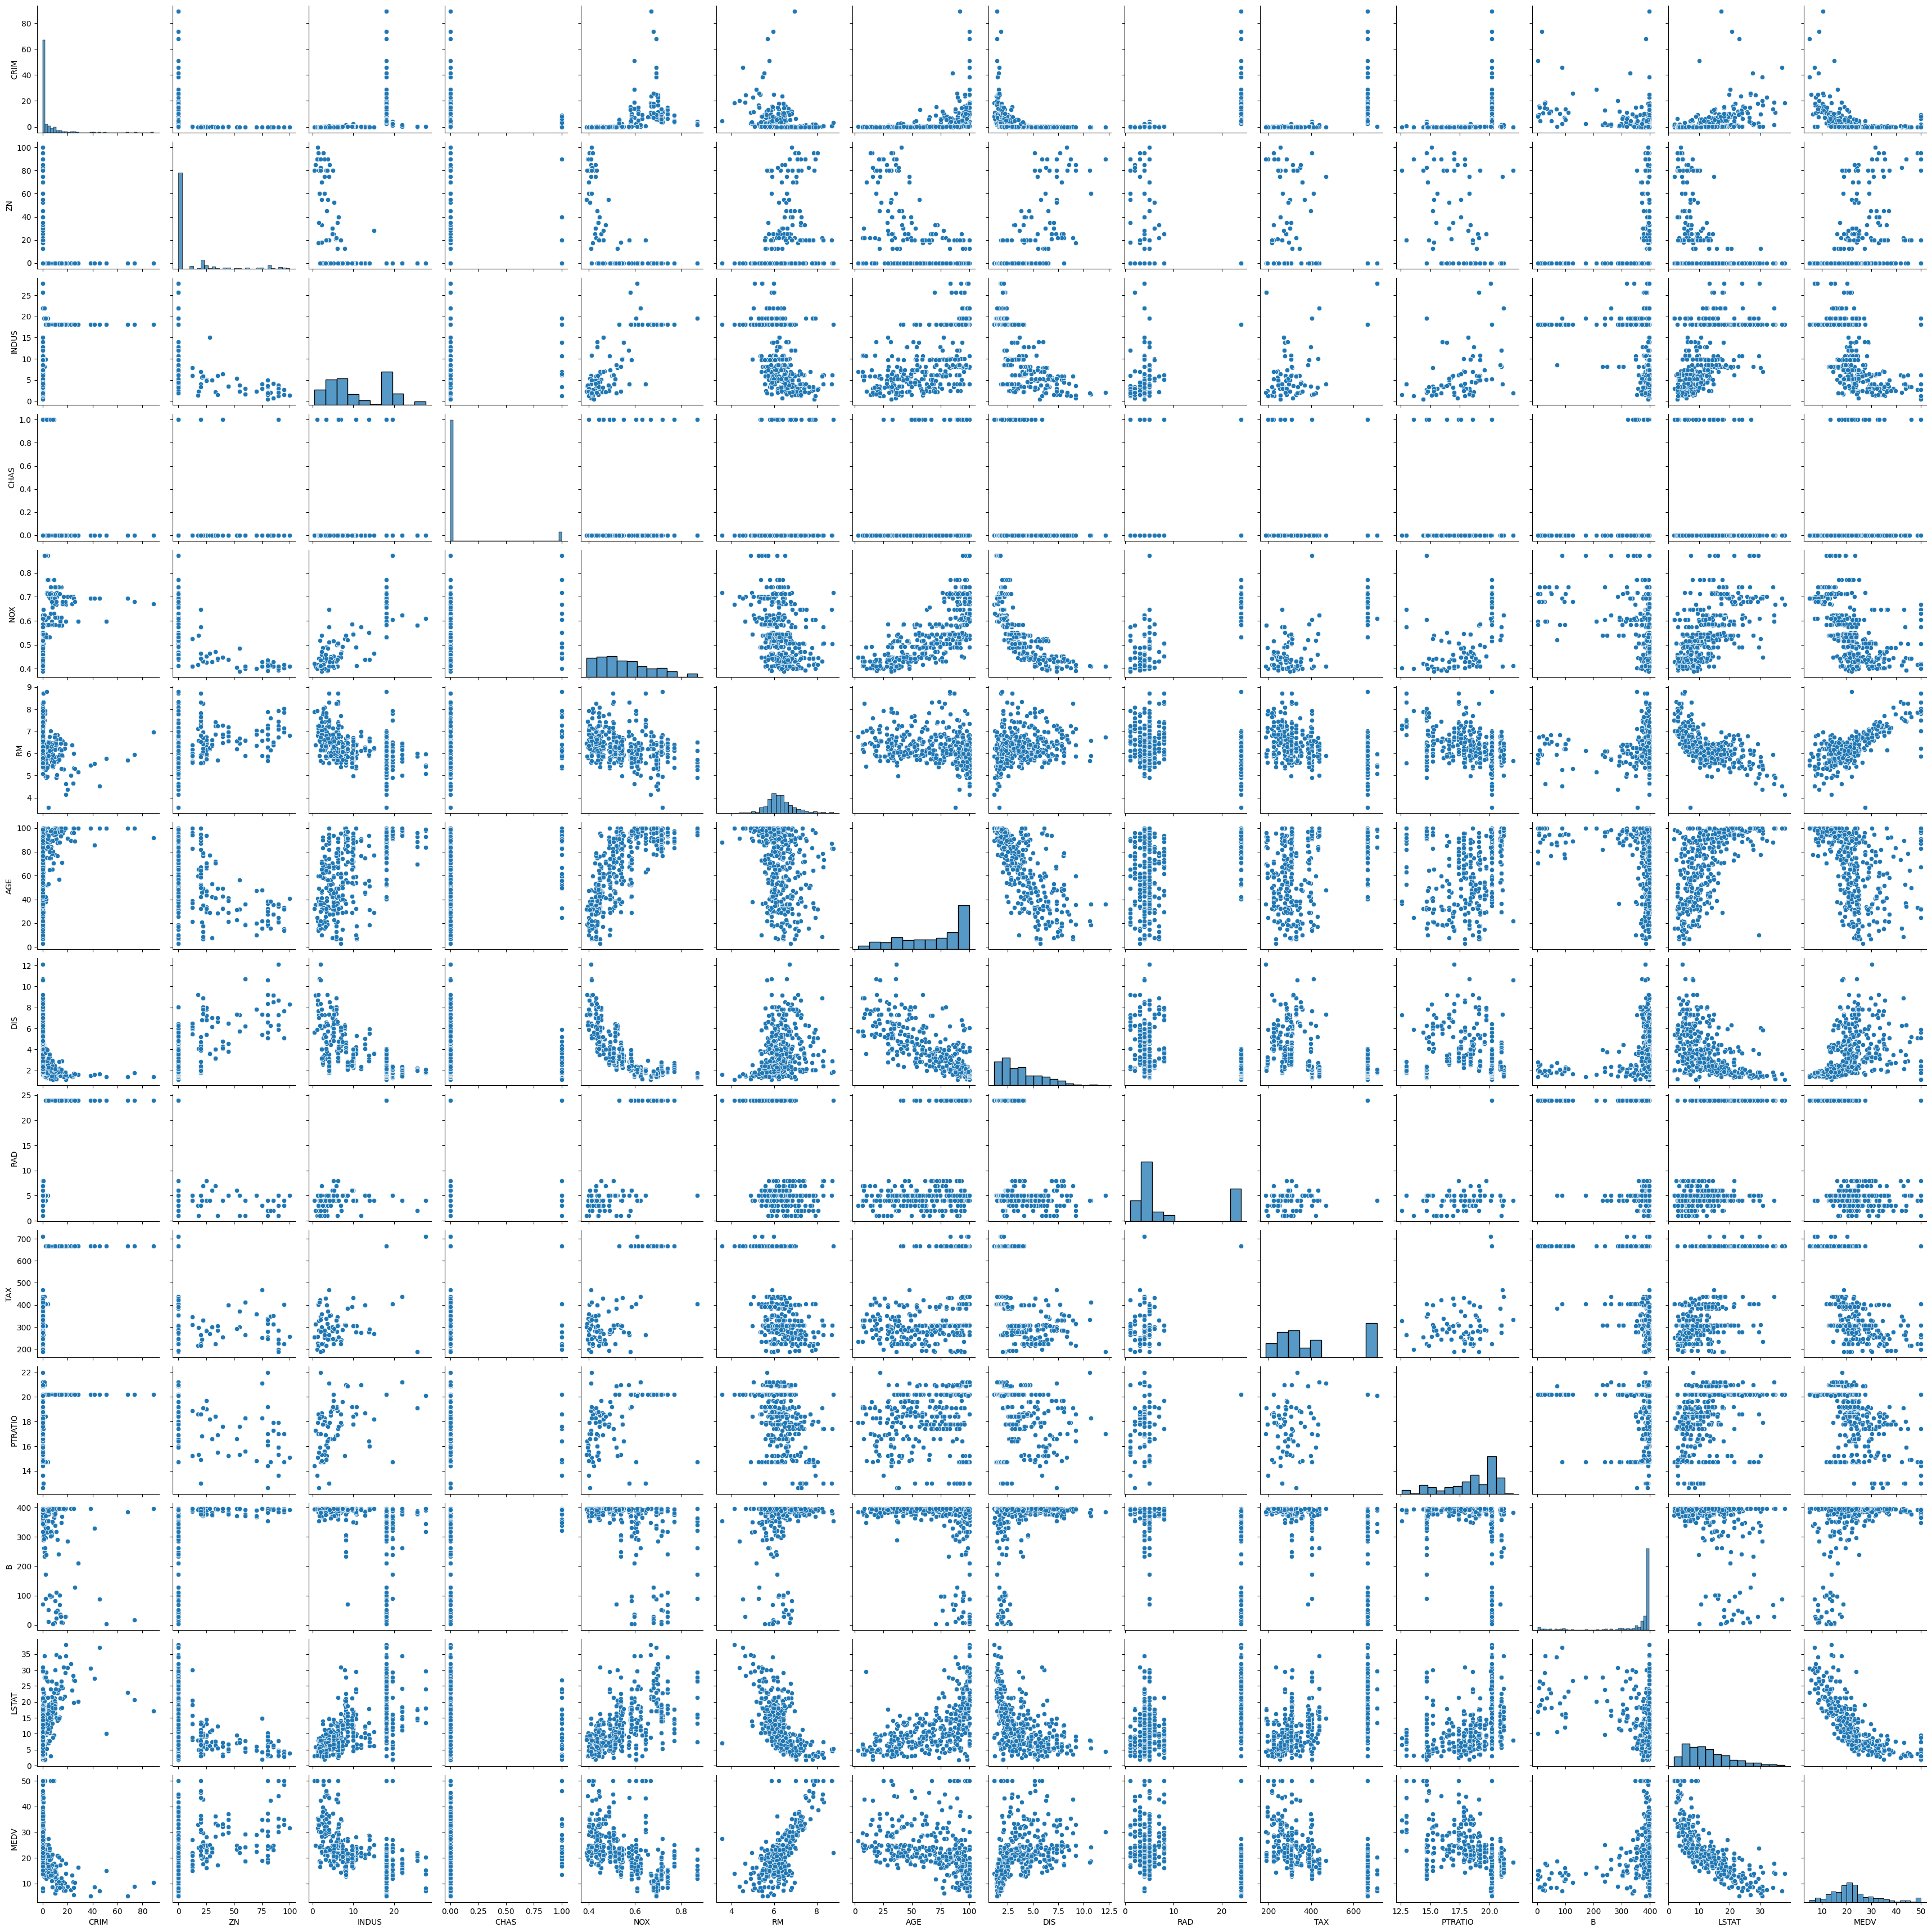

In [57]:
import seaborn as sns
sns.pairplot(df)

## Analyzing The Correlated Features

In [58]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


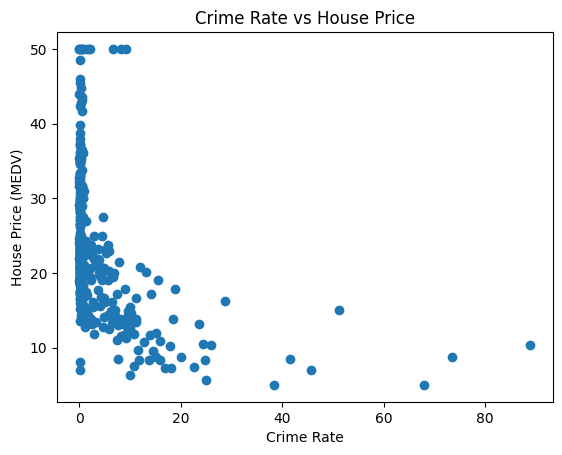

In [61]:
plt.scatter(df['CRIM'], df['MEDV'])    
plt.xlabel("Crime Rate")
plt.ylabel("House Price (MEDV)")
plt.title("Crime Rate vs House Price")
plt.show()


Text(0, 0.5, 'MEDV')

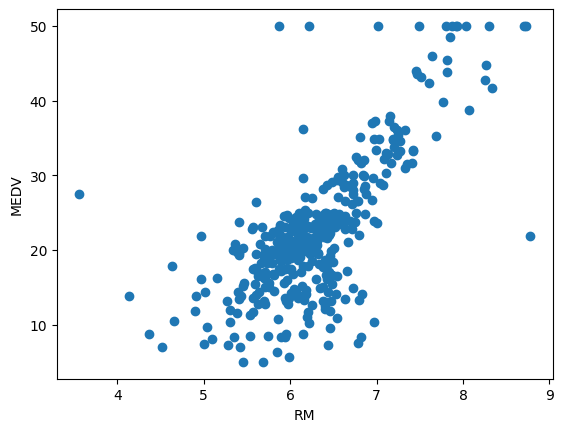

In [63]:
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel("RM")
plt.ylabel("MEDV")

<Axes: xlabel='RM', ylabel='MEDV'>

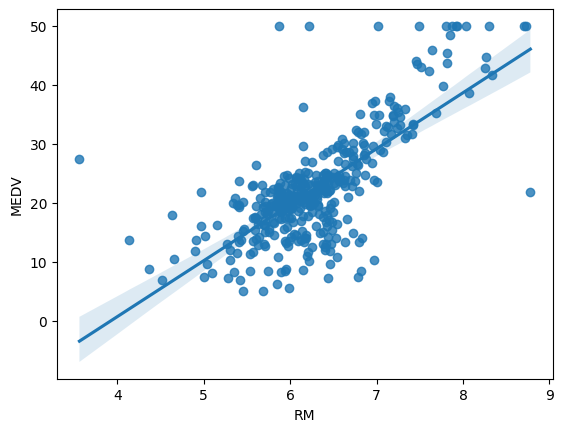

In [65]:
import seaborn as sns
sns.regplot(x="RM",y="MEDV",data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

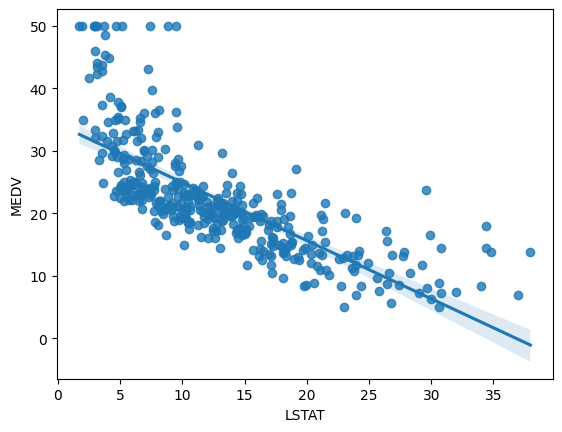

In [67]:
sns.regplot(x="LSTAT",y="MEDV",data=df)

<Axes: xlabel='CHAS', ylabel='MEDV'>

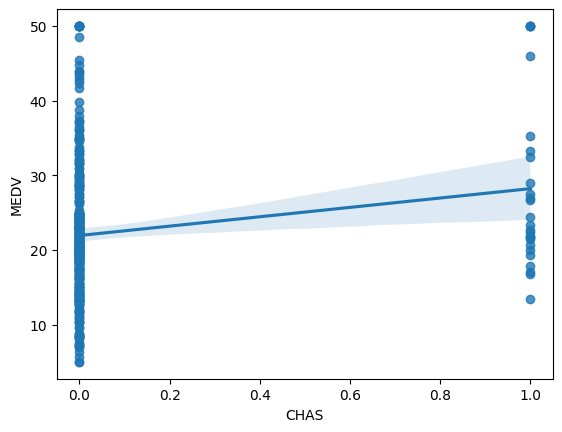

In [69]:
sns.regplot(x="CHAS",y="MEDV",data=df)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

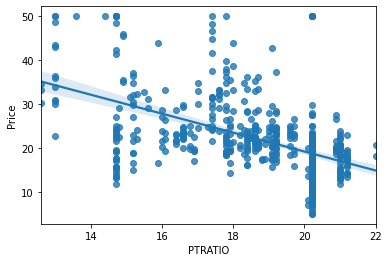

In [24]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

In [72]:
## Independent and Dependent features

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [74]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [75]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [76]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


In [77]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5,398,15.2,377.68,5.10


In [78]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
X_train=scaler.fit_transform(X_train)

In [80]:
X_test=scaler.transform(X_test)

In [81]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [82]:
X_train

array([[-0.3272605 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.40288864,  0.11593724],
       [ 0.04316861, -0.48865541,  1.04820426, ...,  0.75829743,
        -3.55599998,  0.81143377],
       [-0.3349325 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.35532602, -0.02235647],
       ...,
       [-0.40693189, -0.48865541, -0.97303729, ...,  0.1053238 ,
         0.3314929 , -0.32713969],
       [ 0.49545863, -0.48865541,  1.04820426, ...,  0.75829743,
         0.44817157,  0.69327992],
       [-0.40092822, -0.48865541,  2.16128768, ...,  0.24524672,
         0.25325809,  0.66642677]], shape=(275, 13))

In [83]:
X_test

array([[-0.40716288,  0.69773799,  0.59707376, ..., -0.17452204,
         0.4422651 , -0.90716768],
       [-0.40292265,  2.05361617, -1.37109361, ..., -0.12788107,
         0.4008162 , -0.69502782],
       [-0.36380757, -0.48865541, -0.16070753, ..., -0.0812401 ,
         0.44122888, -0.03175507],
       ...,
       [-0.39232937, -0.48865541, -0.53222677, ...,  0.47845159,
         0.44817157, -0.8185523 ],
       [-0.40115241,  1.41804828, -1.11309414, ..., -1.57375126,
         0.24900958, -1.05620265],
       [-0.29417529, -0.48865541,  1.60695739, ...,  1.22470717,
         0.44817157, -0.09485996]], shape=(119, 13))

## Model Training

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regression=LinearRegression()

In [86]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
## print the coefficients and the intercept
type(regression)

sklearn.linear_model._base.LinearRegression

In [90]:
regression.intercept_

np.float64(21.872363636363634)

In [91]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [92]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [93]:
reg_pred

array([29.48758967, 16.89843072, 21.88395113, 30.03140416, 18.33998157,
       34.41717332, 22.29567579, 30.18541478, 32.68800811, 15.15148614,
       22.00937236, 40.89756783, 21.39760824, 16.631487  , 18.56021823,
       20.16135634, 17.03230083, 15.23458095, 22.21007405, 14.03864948,
       18.38308584, 20.31978106, 16.70540425, 29.04732153, 25.84896274,
       16.21750987, 26.91521769, 31.48625718, 23.80195772, 26.88649048,
       40.79205858, 17.93939578, 21.74000234, 17.0218407 , 17.45215081,
       20.87478891, 22.15708989, 21.38558618, 23.05850448, 21.06608939,
       27.72449001, 34.81400202, 21.78651421, 30.44288708, 34.59722541,
       19.75813031, 24.68728038, 10.22457273, 19.81849411, 25.15817576,
       21.82205121, 25.58520471, 14.76531893, 18.31754995, 18.17045495,
       23.96198129, 43.37418034, 22.39050206, 15.68056608, 23.22677962,
       20.98939499, 21.55059106, 14.59407927, 28.87042011, -3.45096729,
       32.51557282, 16.5500498 , 31.10947226, 24.8731608 , 20.17

## Assumptions

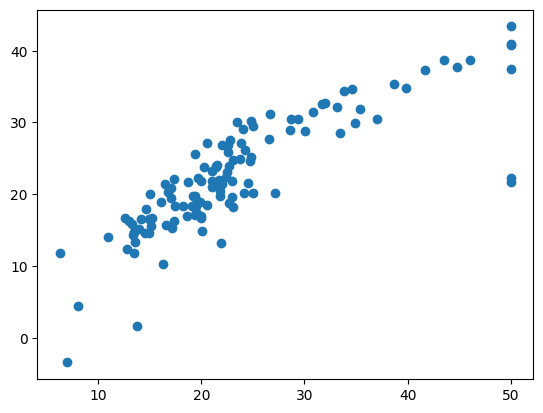

In [95]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [96]:
## Residuals
residuals=y_test-reg_pred

In [97]:
residuals

93    -4.487590
352    1.701569
319   -0.883951
65    -6.531404
499   -0.839982
         ...   
358    3.929978
457    1.646164
321   -1.638334
190    6.555052
131    0.491326
Name: MEDV, Length: 119, dtype: float64

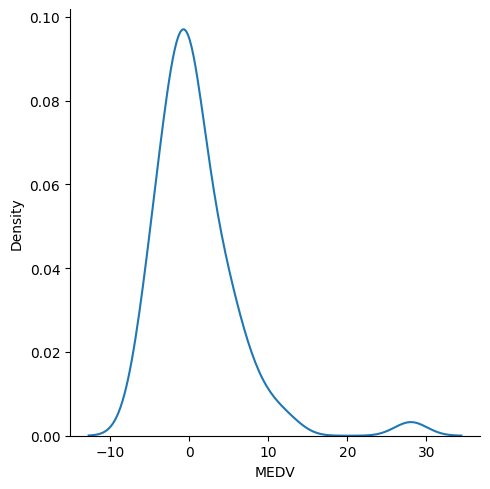

In [98]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

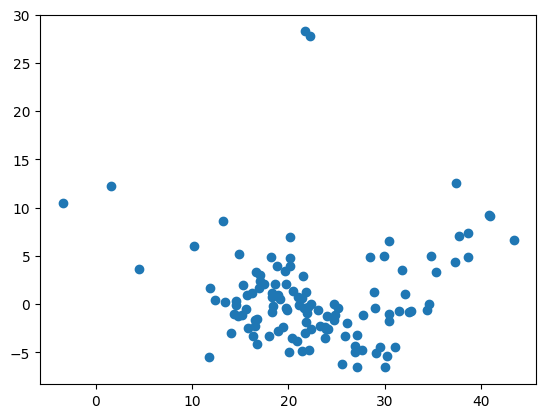

In [99]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [105]:
type(reg_pred)

numpy.ndarray

In [111]:
df_y_test = pd.DataFrame(y_test)

In [114]:
df_reg_pred = pd.DataFrame(reg_pred)

In [109]:
y_test_t = np.array(y_test)

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, reg_pred)
mse = mean_squared_error(y_test,reg_pred)
rmse = np.sqrt(mse)

mae

3.4558210072479927

In [125]:
mse

28.870771928253426

In [126]:
rmse

np.float64(5.3731528852484205)

## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [128]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.6905175764205997

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [129]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6522007049298169

## New Data Prediction

In [136]:
# Get the column names used during training
feature_columns = df.drop("MEDV", axis=1).columns

# Prepare the input row as a DataFrame (instead of NumPy array)
sample_input_df = pd.DataFrame([df.drop("MEDV", axis=1).iloc[0].values], columns=feature_columns)

# Transform and predict
transformed_input = scaler.transform(sample_input_df)
predicted_price = regression.predict(transformed_input)

predicted_price[0]


np.float64(29.047321529048503)

## Pickling The Model file For Deployment

In [139]:
import pickle

In [140]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [141]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [142]:
## Prediction
pickled_model.predict(scaler.transform(sample_input_df))

array([29.04732153])